# Import Libraries And Load Data

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
file_path = 'Train.csv'
Bigmart_data = pd.read_csv(file_path)

# Data Exploration


In [65]:
print(Bigmart_data.head())
print(Bigmart_data.info())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

# Check for missing values

In [66]:
print(Bigmart_data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


# Data Cleaning


In [67]:
Bigmart_data['Item_Weight'].fillna(Bigmart_data['Item_Weight'].median(), inplace=True)
Bigmart_data['Outlet_Size'].fillna(Bigmart_data['Outlet_Size'].mode()[0], inplace=True)

In [68]:
Bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Descriptive Analysis

In [69]:
# Minimum & Maximum sales for each outlet type
outlet_stats = Bigmart_data.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(['min', 'max'])
outlet_stats.columns = ['Min', 'Max']
print(outlet_stats)

                        Min         Max
Outlet_Type                            
Grocery Store       33.2900   1775.6886
Supermarket Type1   73.2380  10256.6490
Supermarket Type2   69.2432   6768.5228
Supermarket Type3  241.6854  13086.9648


In [70]:
# Total sales per outlet type
outlet_sales_total = Bigmart_data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
outlet_sales_total = outlet_sales_total.apply('{:,.2f}'.format)
print(outlet_sales_total)

Outlet_Type
Grocery Store           368,034.27
Supermarket Type1    12,917,342.26
Supermarket Type2     1,851,822.83
Supermarket Type3     3,453,926.05
Name: Item_Outlet_Sales, dtype: object


# Comparison Analysis

In [71]:
# Average sales across different outlet types
average_sales = Bigmart_data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values()
print(average_sales)

Outlet_Type
Grocery Store         339.828500
Supermarket Type2    1995.498739
Supermarket Type1    2316.181148
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64


In [37]:
# Median sales across different outlet types
median_sales = Bigmart_data.groupby('Outlet_Type')['Item_Outlet_Sales'].median().sort_values()
print(median_sales)

Outlet_Type
Grocery Store         256.9988
Supermarket Type2    1655.1788
Supermarket Type1    1990.7420
Supermarket Type3    3364.9532
Name: Item_Outlet_Sales, dtype: float64


# Sales Distribution

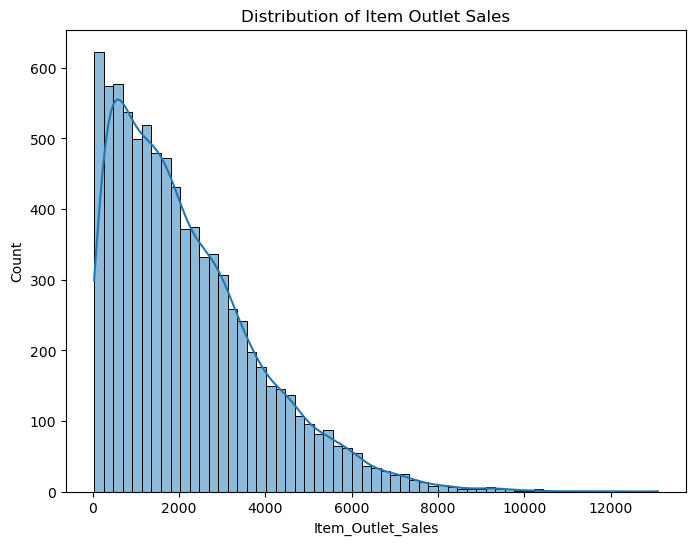

In [72]:
# Distribution of Item Sales
plt.figure(figsize=(8, 6))
sns.histplot(data['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.show()

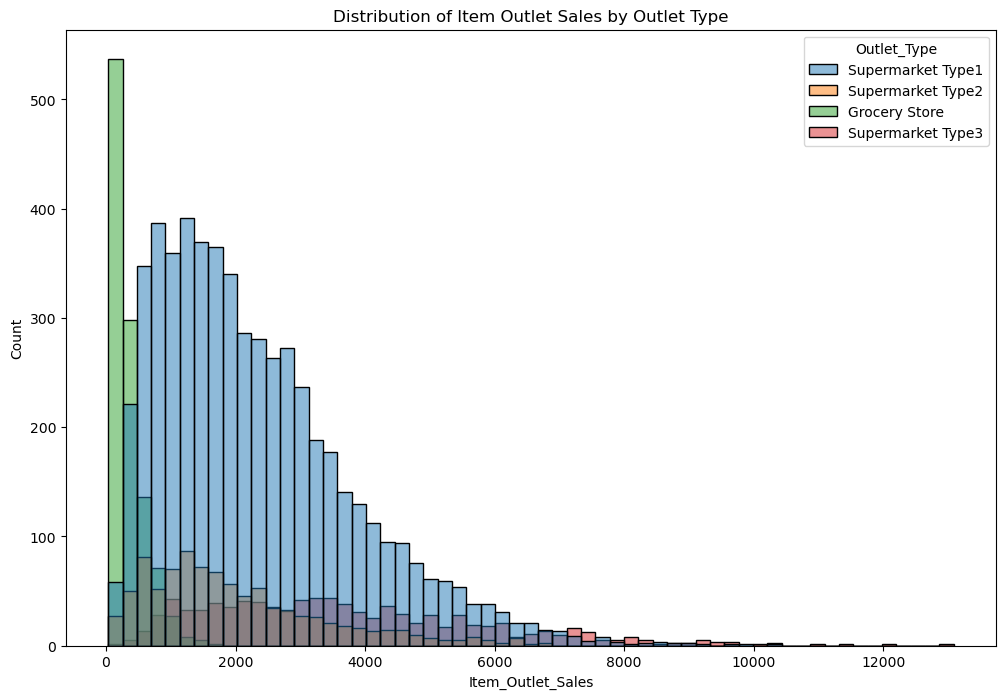

In [73]:
# Histograms
plt.figure(figsize=(12, 8))
sns.histplot(Bigmart_data, x='Item_Outlet_Sales', hue='Outlet_Type')
plt.title('Distribution of Item Outlet Sales by Outlet Type')
plt.show()

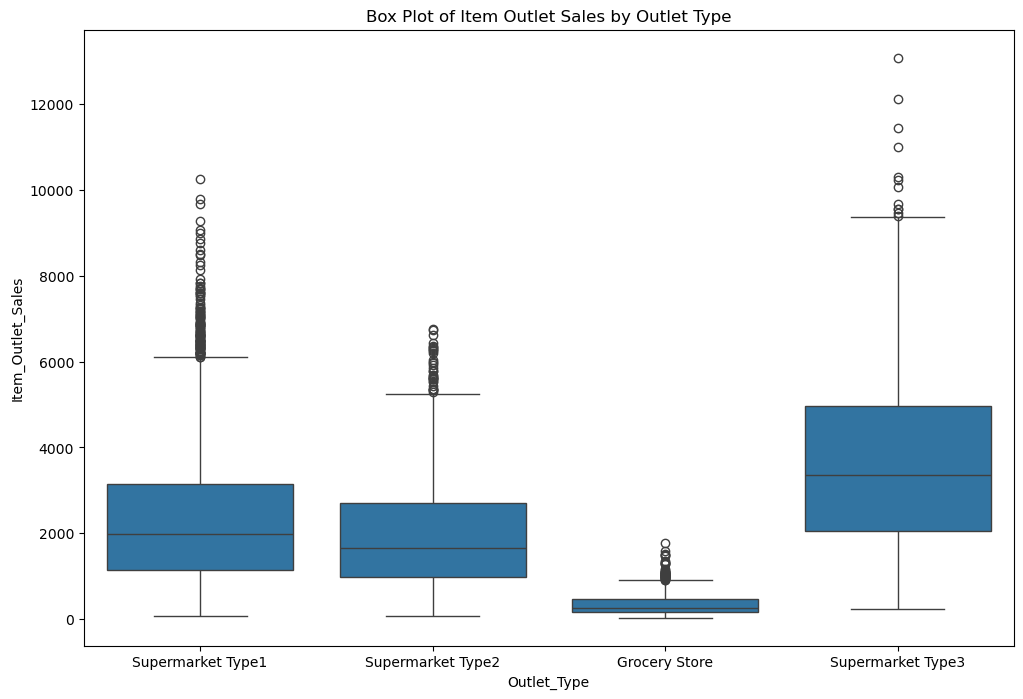

In [74]:
# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=Bigmart_data)
plt.title('Box Plot of Item Outlet Sales by Outlet Type')
plt.show()

# Sales vs. Item MRP

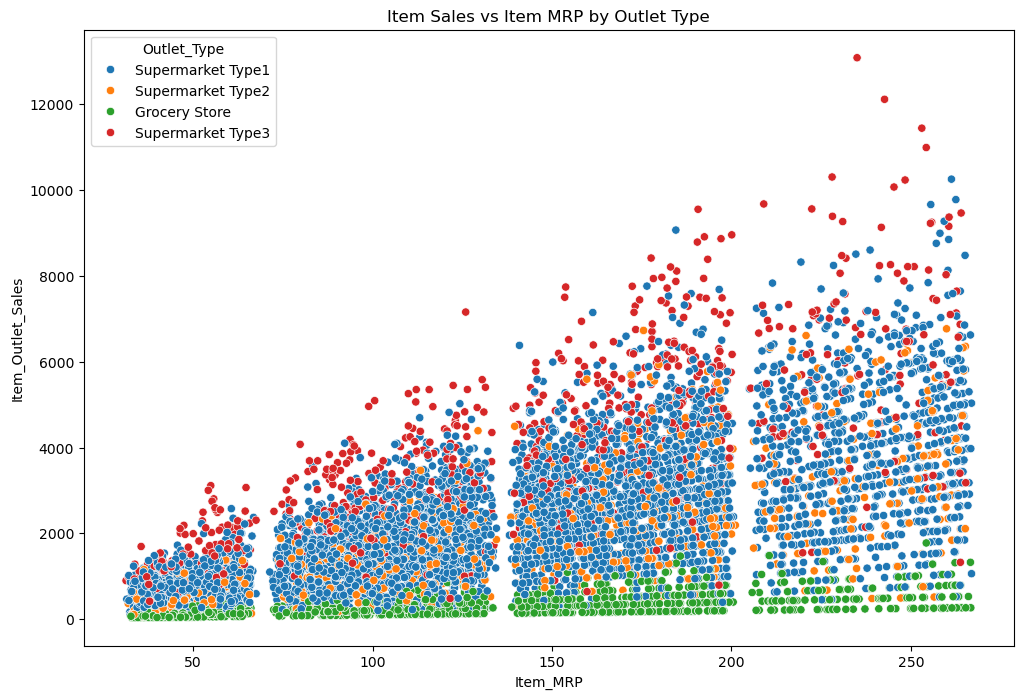

In [75]:
# Calculate average sales by location type
average_sales = Bigmart_data.groupby('Item_MRP')['Item_Outlet_Sales'].mean()
# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type', data=Bigmart_data)
plt.title('Item Sales vs Item MRP by Outlet Type')
plt.show()

# Sales by Location


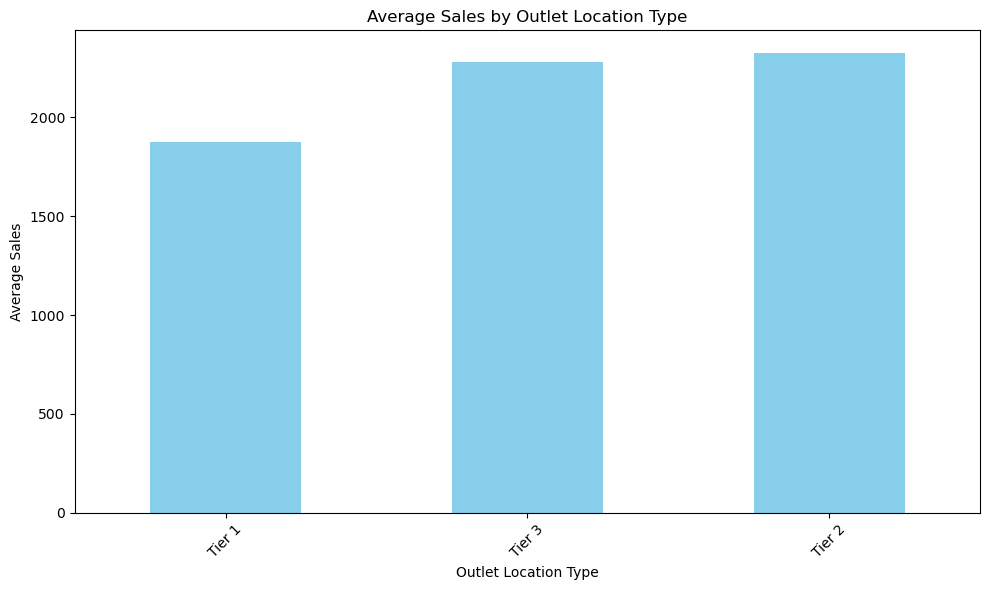

In [76]:
# Average sales by outlet location type
location_sales = Bigmart_data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values()
# Create bar chart
plt.figure(figsize=(10, 6))
location_sales.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Analysis

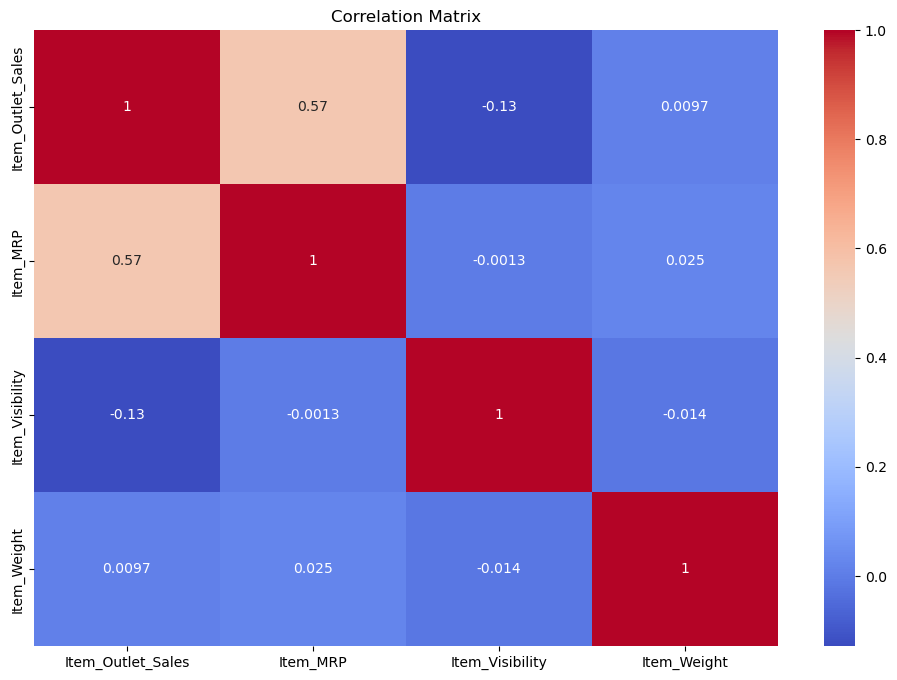

In [77]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = Bigmart_data[['Item_Outlet_Sales', 'Item_MRP', 'Item_Visibility', 'Item_Weight']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()